In [1]:
from summer2 import CompartmentalModel
from summer2.parameters import Parameter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameterise
population = 100000.
latent_period = 8.
infectious_period = 7.
r0 = 13.
infectious_seed = 1.

parameters = {
    "contact_rate": r0 / infectious_period,
    "infous_rate": 1. / latent_period,
    "progression_rate": 1. / infectious_period,
}

In [3]:
# Create equivalent model
compartments = (
    "Susceptible", 
    "Infectious", 
    "AIDS"
)
hiv_model = CompartmentalModel(
    times=(0., 100.),
    compartments=compartments,
    infectious_compartments=("Infectious",),
)
hiv_model.set_initial_population(
    distribution={
        "Susceptible": population - infectious_seed, 
        "Infectious": infectious_seed
    }
)
hiv_model.add_infection_frequency_flow(
    name="infection", 
    contact_rate=Parameter("contact_rate"),
    source="Susceptible",
    dest="Infectious"
)
hiv_model.add_transition_flow(
    name="progression", 
    fractional_rate=Parameter("progression_rate"), 
    source="Infectious", 
    dest="AIDS"
)

In [4]:
# Run our SEIR model
hiv_model.run(parameters=parameters)
compartments = hiv_model.get_outputs_df()

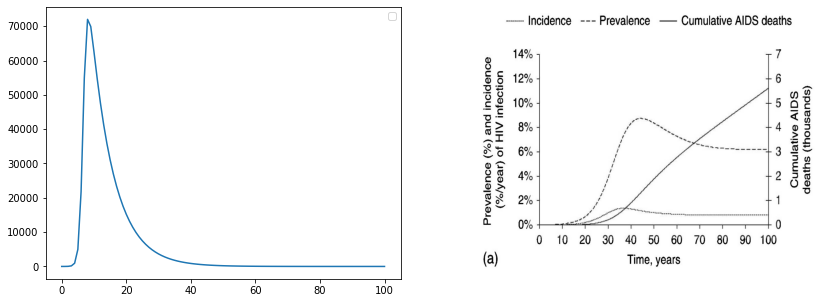

In [7]:
fig, (left_ax, right_ax) = plt.subplots(1, 2, figsize=(14, 5))
left_ax.plot(
    hiv_model.times,
    compartments["Infectious"],
)
# left_ax.set_xlim(0., 120.)
# left_ax.set_xlabel("Time (days)")
# left_ax.set_ylim(0., 12.)
# left_ax.set_ylabel("ln {number or cumulative number of infectious individuals}")
# left_ax.set_title("Measles")
left_ax.legend()

image = plt.imread("./figures/fig_8_20a.jpg")
right_ax.axis("off")
right_ax.imshow(image, aspect="auto");